<a href="https://colab.research.google.com/github/krmiddlebrook/intro_to_deep_learning/blob/master/machine_learning/lesson%201%20-%20linear%20regression/examples/multiple-linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression: What Makes Us Happy?

In our previous lesson, we explored the topic of single-variable linear regression and demonstrated how to build a linear model as a single-layer neural network. In single-variable regression analysis, there is only one independent variable (i.e., x variable) and one dependent variable (i.e., y variable). However, what if we want to build a model to predict a label given multiple x variables (i.e., features)? To achieve this, we use multiple linear regression--a method to model the relationship between a dependent variable (y) and multiple independent variables (x). Intuitively, adding more x (in this case x columns) data to our features tends to help the model improve its overall performance.

While adding more variables allows us to model more complex "real-world" relationships there are also additional steps we must take to make sure our model is sound and robust.

In this lesson, we introduce the multiple linear regression method and demonstrate how to build a multiple linear regression model to predict happiness Scores using the same [World Happiness Report dataset](https://www.kaggle.com/unsdsn/world-happiness) from the previous lesson. 


## Multiple Linear Regression
Before we discuss multiple linear regression, let's review single-variable linear regression. Recall that single-variable linear regression aims to fit a line to the data using the following formula: 
$$
\hat{y} = wx + b
$$
where $w$ is known as the *weight*, and $b$ is   the *bias* term.

When the inputs ($x$) consists of $d$ features, we express the above linear function as: 
$$
\hat{y} = w_1  x_1 + ... + w_d  x_d + b.
$$

In machine learning, we typically work with *high-dimensional* datasets, meaning $d$ is large so there are many features. When $d$ is large, it's not convenient to write the above linear equation, instead we can express it using vector notation as follows:
$$
\hat{y} = \mathbf{w}^\top \mathbf{x} + b.
$$

where the vector $\mathbf{x} \in \mathbb{R}^d$ and the vector $\mathbf{w} \in \mathbb{R}^d$  contain the *features* and *weights* respectively.

In the above equation, $\mathbf{x}$ corresponds to a single input sample. It is often more convenient to refer to features of our entire dataset of $n$ samples via the *matrix* $\mathbf{X} \in \mathbb{R}^{n \times d}$, where each sample is represented by a row and each feature by a column. For a collection of features $\mathbf{X}$ and labels $y \in \mathbb{R^n}$, the multiple linear regression function can be expressed as the matrix-vector product:

$$
{\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b.
$$

The goal of multiple linear regression is to find the weight vector  $\mathbf{w}$  and the bias term  $b$  that results in the lowest prediction error. Notice that the goal is basically the same as single-variable linear regression except multiple weights are learned instead of one.

The figure below illustrates a single-layer multiple linear regression neural network. The input layer consists of $d$ *neurons* each corresponding to a feature (from $\mathbf{x}$) and $d$ *connections* each corresponding to the *weight* between the output neuron an input neuron. 

<figure>
<img src='https://d2l.ai/_images/singleneuron.svg' width='60%'></img><figcaption>Linear Regression: a multiple linear regression neural network</figcaption>
</figure>




# Multiple Linear Regression: What makes us happy?
Now that we know a bit about the multiple linear regression method, it's time to apply it to a real-world problem--predicting happiness given country statistics. Our goal is to build a *single-layer fully-connected neural network* (i.e., a mutliple linear regression model) to predict a country's happiness Score using the World Happiness (https://www.kaggle.com/unsdsn/world-happiness) dataset.

Like single-variable linear regression, we will perform the following steps:

1. Explore and prepare the dataset.
2. Build the model.
3. Train the model.
4. Evaluate the model.
5. Draw conclusions.


In [ ]:
# import the libraries we be need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## 1. Explore and prepare the dataset


In [ ]:
# load the dataset into a dataframe
data_url = 'https://raw.githubusercontent.com/krmiddlebrook/intro_to_deep_learning/master/datasets/world-happiness/2019.csv'
happy2019 = pd.read_csv(data_url)
happy2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


There are two variables we don't want to use in our model: Overall rank and Country or region. In the below cell, we will remove those variables and prepare the dataset for the model. Remember this process involves defining the features ($\mathbf{x}$) and the labels ($y$), splitting the dataset into a training and test set, and separating the features and the labels in both sets. 

In [ ]:
# define the x (features) and y (labels) variables
x_cols = happy2019.columns[3:].tolist() 
y_col = 'Score'
print('x features: ', x_cols)
print('y labels: ', y_col)

# split the dataset into train/test datasets 
train = happy2019.sample(frac=0.8, random_state=0)
test = happy2019.drop(train.index)

# separate the x (features) and y (labels) in the train/test datasets
train_features = train[x_cols].values
test_features = test[x_cols].values

train_labels = train[y_col].values.reshape(-1, 1)
test_labels = test[y_col].values.reshape(-1, 1)


print('train features shape:', train_features.shape)
print('train labels shape:', train_labels.shape)

print('test features shape:', test_features.shape)
print('test labels shape:', test_labels.shape)

print('first 5 test labels:\n', test_labels[:5])

x features:  ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
y labels:  Score
train features shape: (125, 6)
train labels shape: (125, 1)
test features shape: (31, 6)
test labels shape: (31, 1)
first 5 test labels:
 [[7.246]
 [6.726]
 [6.444]
 [6.354]
 [6.3  ]]


The above code returns a training and test dataset. The *features* correspond to GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, and  Perceptions of corruption columns and the happiness Score corresponds to the *labels*. There are two datasets--a *training dataset* and a *test dataset*. The `train_features` and `train_labels` arrays represent the features and labels of the training dataset. The `test_features` and `test_labels` arrays represent the features and labels of the test dataset.  

## 2. Build the model
Now that the data is ready, we can build the model! 

Before we define the model in Python code, let's write out its function given one input sample:
$$
\hat{\text{score}} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 + w_5 x_5 + w_6 x_6 + b,
$$
where 1-6 corresponds to one of the feature column we defined earlier (i.e., GDP per capita, Social support, etc.). The function can be compressed using vector notation as:
$$ 
\hat{\text{score}} = \mathbf{w}^\top \mathbf{x} + b.
$$

Given the entire training set, we write the matrix-vector equation for our linear model as:
$$
{\hat{\textbf{score}}} = \mathbf{X} \mathbf{w} + b.
$$

The model we build and then train will try to find the optimal *weights* ($\mathbf{w}$) to minimize the difference between the real labels ($\textbf{score}$) and the predictions ($\hat{\textbf{score}})$.

Now that we know the function we want to estimate, let's use [Tensorflow](https://www.tensorflow.org/) to build a linear regression model, just like we did in the last lesson.


In [ ]:
# build the linear model 
model = keras.Sequential([
            layers.Input((6,)), # the input layer (corresponds to the features)
            layers.Dense(1), # out layer (contains the 6 weights and a bias term)
        ], name='multiple_linear_regression_model')

print('model summary')
print(model.summary())

model summary
Model: "multiple_linear_regression_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None


The model we defined above is a multiple linear model that could also be called a *single-layer fully-connected neural network*. We defined it using the `Dense` class. Note that we passed two arguments into the `Sequential` class. The first one specifies the input feature dimension, which is 6 (corresponding to the number of x features), and the second one is the output feature dimension, which is a single scalar and therefore 1. Each input *feature* has a corresponding *weight* and there is one bias term. The *weights* and *bias*, or *parameters*, are connected to the single output *neuron*.  

### Define the loss function, optimization algorithm, and metrics 

After defining the model, we need to configure the *loss function*, *optimization algorithm*, and *metrics* for the model. We will use mean squared error for the loss function, stochastic gradient descent for the optimization algorithm, and mean absolute error and mean squared error for the metrics. We glue these configurations to our model using the `compile` method.

In [ ]:

model.compile(loss=keras.losses.MSE,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=[keras.metrics.MAE, keras.metrics.MSE])

## 3. Train the model
Now that we have a model, it's time to train it. We will train the model for 100 *epochs* (i.e., iterations), and record the training and validation metrics in the `history` object. 

In [ ]:
epochs = 100

history = model.fit(train_features, train_labels,
                    epochs=epochs, validation_split=0.1)

Epoch 1/100
4/4 [==============================] - 0s 26ms/step - loss: 33.3436 - mean_absolute_error: 5.6296 - mean_squared_error: 33.3436 - val_loss: 22.8826 - val_mean_absolute_error: 4.6577 - val_mean_squared_error: 22.8826
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 16.7526 - mean_absolute_error: 3.9947 - mean_squared_error: 16.7526 - val_loss: 11.4207 - val_mean_absolute_error: 3.2561 - val_mean_squared_error: 11.4207
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 8.4914 - mean_absolute_error: 2.8171 - mean_squared_error: 8.4914 - val_loss: 5.9405 - val_mean_absolute_error: 2.2980 - val_mean_squared_error: 5.9405
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 4.4807 - mean_absolute_error: 2.0120 - mean_squared_error: 4.4807 - val_loss: 3.1645 - val_mean_absolute_error: 1.6041 - val_mean_squared_error: 3.1645
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 2.4357 - mean_absolute_erro

We get to ~0.3542 validation mean squared error after training for 100 epochs on the training dataset. For reference, the same metric was ~0.7807 in the single-variable linear regression model (from the previous lesson).  Let's visualize the model's training progress using the stats stored in the history object.



        loss  mean_absolute_error  ...  val_mean_squared_error  epoch
95  0.359492             0.488087  ...                0.489979     95
96  0.358822             0.487758  ...                0.489611     96
97  0.358735             0.487253  ...                0.489042     97
98  0.358198             0.487372  ...                0.488747     98
99  0.358247             0.487920  ...                0.488234     99

[5 rows x 7 columns]


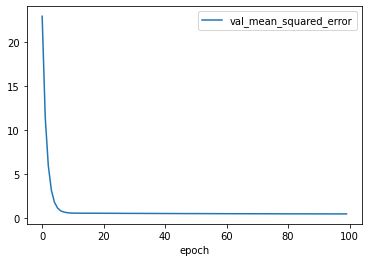

In [ ]:
# create a dataframe to store the history 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

# visualize the mean squared error over the training process
hist.plot.line(x='epoch', y='val_mse');

From the plot we can see that our model *converges* around the 10th epoch. In other words, the most optimal parameters (weights and bias) are found after about the 10 training iteration. 

## 4. Evaluate the model
Now that we trained our model, it's time to evaluate it using the *test* dataset, which we did not use when training the model. This gives us a sense of how well our model predicts unseen data, which is the case when we use it in the real world. We will use the `evaluate` method to test the model. 

In [ ]:
loss, mae, mse = model.evaluate(test_features, test_labels)
print('Test set Mean Absolute Error: ', round(mae, 4))

1/1 [==============================] - 0s 1ms/step - loss: 0.2282 - mean_absolute_error: 0.4185 - mean_squared_error: 0.2282
Test set Mean Absolute Error:  0.4185


The average (absolute) error is around +/- 0.4185 units for happiness Score, which is better than the single-variable linear model (+/- 0.516). Is this good? We'll leave that decision up to you. Let's also visualize the prediction and real happiness Score values using data in the test set.

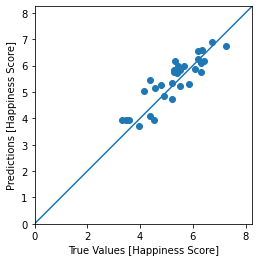

In [ ]:
test_predictions = model.predict(test_features).flatten()

ax = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Happiness Score]')
plt.ylabel('Predictions [Happiness Score]')
lims = [0, max(test_labels) + 1] # [0, 31]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

It looks like our model predicts reasonably well. Let's take a look at the error distribution.

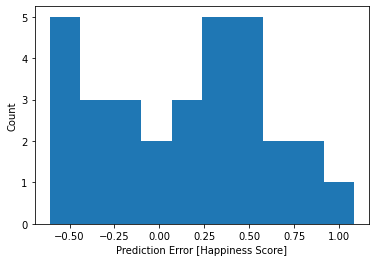

In [ ]:
error = test_predictions.reshape(-1, 1) - test_labels
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [Happiness Score]")
_ = plt.ylabel("Count")

The histogram shows that the errors aren't quite *Normally distributed* (also called *gaussian*), but we might expect that because the number of samples is very small.

## 5. Draw Conclusions
We built a single-layer fully-connected neural network model (multiple linear regression model) to predict happiness Score given a country's features. The model converged after about 10 epochs of training, and it achieved an average (absolute) error of +/- 0.4185. Including more features in the model outperformed the single-variable linear regression model, confirming the hypothesis we made last lesson that more features could improve performance. That said, we expect that a *deeper* model (more layers and neurons) and more data samples will improve performance.     

# Summary
In this lesson we took a deeper dive into multiple regression, from the perspective of neural networks. We built a single-layer fully-connected neural network and demonstrated how to train and evaluate it. We covered several important techniques, most importantly: using multiple features to train a linear model.